###Exercício 1 - Mercado Financeiro e Ações

Extração dos Dados pelo Yahoo Finance

In [ ]:
import yfinance as yf
import pandas as pd

tickers = ['PETR4.SA', 'ITUB4.SA', 'VALE3.SA']
dados_acoes = yf.download(tickers, period='100d')

dados_acoes

/tmp/ipython-input-2755594867.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  3 of 3 completed


Price           Close                             High                        \
Ticker       ITUB4.SA   PETR4.SA   VALE3.SA   ITUB4.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2025-05-05  34.122665  28.153671  51.164619  34.661340  29.064917  51.280554   
2025-05-06  33.946377  28.618784  51.203262  34.161848  28.846595  51.763602   
2025-05-07  34.318554  28.751677  51.106655  34.416494  28.761167  51.734617   
2025-05-08  34.592781  29.150343  50.952080  35.258781  29.454093  51.493093   
2025-05-09  36.463459  29.340187  51.154961  36.483048  29.596475  51.280555   
...               ...        ...        ...        ...        ...        ...   
2025-09-16  37.900002  31.530001  57.700001  38.250000  31.680000  58.060001   
2025-09-17  38.439999  31.719999  57.799999  38.820000  31.790001  58.020000   
2025-09-18  38.490002  31.410000  57.689999  38.549999  31.820000  58.080002   
2025-09-19  39.000000  31.059999  57.919998  39.000000  31.450001  58.189999   
2025-09-22  38.439999  31.370001  58.000000  38.860001  31.469999  58.439999   

Price             Low                             Open                        \
Ticker       ITUB4.SA   PETR4.SA   VALE3.SA   ITUB4.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2025-05-05  34.034518  28.153671  50.942417  34.524224  29.017455  51.106656   
2025-05-06  33.711317  28.438433  51.125973  34.103082  28.580816  51.193603   
2025-05-07  34.014935  28.381482  50.874790  34.201022  28.761167  51.734617   
2025-05-08  34.416487  28.903549  50.884449  34.867015  29.036438  51.106656   
2025-05-09  35.053109  29.083899  50.729875  35.650550  29.520538  51.203265   
...               ...        ...        ...        ...        ...        ...   
2025-09-16  37.669998  31.340000  57.189999  38.189999  31.600000  57.770000   
2025-09-17  37.860001  31.459999  57.360001  37.930000  31.540001  57.540001   
2025-09-18  38.160000  31.190001  57.400002  38.439999  31.770000  57.840000   
2025-09-19  38.450001  30.910000  57.549999  38.500000  31.430000  57.970001   
2025-09-22  38.279999  30.840000  57.810001  38.730000  31.000000  57.820000   

Price         Volume                      
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2025-05-05  27611800  59011700  12201600  
2025-05-06  17255400  52751300  12065000  
2025-05-07  13397900  35050400  11240100  
2025-05-08  33186100  44665000  15414600  
2025-05-09  58004600  25075600  15558800  
...              ...       ...       ...  
2025-09-16  19411200  19154700  15618500  
2025-09-17  24491600  29148100  23116700  
2025-09-18  14983500  25702900  17700400  
2025-09-19  25925100  48871300  25374600  
2025-09-22  17123700  21339500  21317300  

[100 rows x 15 columns]

Calculo do Retorno e Volatilidade Diária

In [ ]:
close_df = dados_acoes['Close']

close_df.columns = ['ITUB4', 'PETR4', 'VALE3']

retornos_diarios = close_df.pct_change().dropna()

volatilidade = retornos_diarios.std()

retorno_total = (close_df.iloc[-1] / close_df.iloc[0]) - 1

resumo_df = pd.DataFrame({
  'Retorno Total no Período (%)': retorno_total * 100,
  'Volatilidade Diária (%)': volatilidade * 100
})

print("Tabela de Resumo (Últimos 100 dias)")
print(resumo_df.sort_values(by='Retorno Total no Período (%)', ascending=False))

Tabela de Resumo (Últimos 100 dias)
       Retorno Total no Período (%)  Volatilidade Diária (%)
VALE3                     13.359584                 1.256038
ITUB4                     12.652392                 1.296621
PETR4                     11.424192                 1.312114


Gráficos de Desempenho das Ações

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

preco_normalizado_df = (close_df / close_df.iloc[0] * 100)

fig = px.line(
  preco_normalizado_df,
  title='<b>Desempenho Relativo das Ações nos Últimos 100 Dias</b>',
  labels={
    "Date": "Data",
    "value": "Preço Normalizado",
    "variable": "Ações"
  }
)

fig.update_layout(
  title_x=0.5,
  legend_title_text='<b>Ações</b>'
)

fig.show()

In [ ]:
df_long = (retornos_diarios * 100).melt(var_name='Ação', value_name='Retorno Diário (%)')

fig = px.box(
  df_long,
  x='Ação',
  y='Retorno Diário (%)',
  title='<b>Distribuição dos Retornos Diários (Volatilidade)</b>',
  points='all'
)

fig.add_hline(y=0, line_dash="dash", line_color="black")

fig.update_layout(
  title_x=0.5,
  yaxis_title="Retorno Diário (%)",
  xaxis_title="Ação"
)

fig.show()

Análises dos Resultados:

**1 - Tendências de Alta e Queda**

Podemos observar que todas as 3 ações tiveram um bom crescimento nesse período de 100 dias com a VALE3 tendo uma tendência de alta maior entre as 3, oque significa que é um momento bom para se investir nesses setores

**2 - Volatilidade dos papéis**

Das 3 ações a que mais teve volatidade foi a PETR4, isso se deve muito por seu setor ser o petrolifero o que sofre bastante interferência dos acontecimentos globais e cenários políticos, logo depos veio a do ITUB4 o que pode ser por causa da alta no valor da SELIC e na estagnação da economia nacional

**3 - Comparação entre setores**

Entre os setores o que teve um melhor desempenho foi o de mineiração representado pela VALE3 com um dos melhores crescimentos e menor volatilidade, o prato perfeito para um investidor, logo depois temos o setor bancário que ele ficou com um desempenho intermédiario tanto em seu crescimento quanto em sua volatilidade, e por último o setor petrolifero com um crescimento bom tambem, porém com uma alta volatidade o que pode ser bem arriscado dependendo do investimento que você fizer

**4 - Oportunidades e riscos para investidores**

* VALE3 -> Excelente oprtunidade pelo crescimento á um risco menor

* ITUB4 -> Oportunidade boa de crescimento tambem, com um risco não tão alto, mas tambem não tão baixo

* PETR4 -> Teve uma oportunidade boa de crescimento também, porém aos custos de um risco maior

**Conclusão**

A escolha de em qual empresa investir depende muito do perfil do investidor, porém nesse caso a VALE3 acaba tendo um destaque maior por seu melhor retorno ao custo de um risco menor

###Exercício 2 - Risco de Crédito Bancário

Extração de Dados

In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-risk-dataset' dataset.
Path to dataset files: /kaggle/input/credit-risk-dataset


In [ ]:
path = '/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv'

credit_risk = pd.read_csv(path)

credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Tratamento de Dados

In [ ]:
credit_risk = credit_risk.rename(columns={
  'person_age': 'idade',
  'person_income': 'renda_anual',
  'person_home_ownership': 'tipo_moradia',
  'person_emp_length': 'tempo_emprego_anos',
  'loan_intent': 'finalidade_emprestimo',
  'loan_grade': 'classificacao_emprestimo',
  'loan_amnt': 'valor_emprestimo',
  'loan_int_rate': 'taxa_juros',
  'loan_status': 'status_emprestimo',
  'loan_percent_income': 'percentual_renda_comprometida',
  'cb_person_default_on_file': 'historico_inadimplencia',
  'cb_person_cred_hist_length': 'duracao_historico_credito'
})

credit_risk

,idade,renda_anual,tipo_moradia,tempo_emprego_anos,finalidade_emprestimo,classificacao_emprestimo,valor_emprestimo,taxa_juros,status_emprestimo,percentual_renda_comprometida,historico_inadimplencia,duracao_historico_credito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
credit_risk.groupby('finalidade_emprestimo')['finalidade_emprestimo'].count()

,finalidade_emprestimo
finalidade_emprestimo,
DEBTCONSOLIDATION,5212
EDUCATION,6453
HOMEIMPROVEMENT,3605
MEDICAL,6071
PERSONAL,5521
VENTURE,5719


In [ ]:
credit_risk['finalidade_emprestimo'] = credit_risk['finalidade_emprestimo'].replace({
  'DEBTCONSOLIDATION': 'Consolidação de Dívidas',
  'EDUCATION': 'Educação',
  'HOMEIMPROVEMENT': 'Reforma da Casa',
  'MEDICAL': 'Médico',
  'PERSONAL': 'Pessoal',
  'VENTURE': 'Empreendimento'
})

credit_risk.groupby('finalidade_emprestimo')['finalidade_emprestimo'].count()

,finalidade_emprestimo
finalidade_emprestimo,
Consolidação de Dívidas,5212
Educação,6453
Empreendimento,5719
Médico,6071
Pessoal,5521
Reforma da Casa,3605


In [ ]:
credit_risk.groupby('tipo_moradia')['tipo_moradia'].count()

,tipo_moradia
tipo_moradia,
MORTGAGE,13444
OTHER,107
OWN,2584
RENT,16446


In [ ]:
credit_risk['tipo_moradia'] = credit_risk['tipo_moradia'].replace({
  'MORTGAGE': 'Financiamento Imobiliário',
  'OTHER': 'Outro',
  'OWN': 'Casa Própria',
  'RENT': 'Aluguel',
})

credit_risk.groupby('tipo_moradia')['tipo_moradia'].count()

,tipo_moradia
tipo_moradia,
Aluguel,16446
Casa Própria,2584
Financiamento Imobiliário,13444
Outro,107


In [ ]:
credit_risk.head()

,idade,renda_anual,tipo_moradia,tempo_emprego_anos,finalidade_emprestimo,classificacao_emprestimo,valor_emprestimo,taxa_juros,status_emprestimo,percentual_renda_comprometida,historico_inadimplencia,duracao_historico_credito
0,22,59000,Aluguel,123.0,Pessoal,D,35000,16.02,1,0.59,Y,3
1,21,9600,Casa Própria,5.0,Educação,B,1000,11.14,0,0.10,N,2
2,25,9600,Financiamento Imobiliário,1.0,Médico,C,5500,12.87,1,0.57,N,3
3,23,65500,Aluguel,4.0,Médico,C,35000,15.23,1,0.53,N,2
4,24,54400,Aluguel,8.0,Médico,C,35000,14.27,1,0.55,Y,4


In [ ]:
credit_risk.describe()

,idade,renda_anual,tempo_emprego_anos,valor_emprestimo,taxa_juros,status_emprestimo,percentual_renda_comprometida,duracao_historico_credito
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   idade                          32581 non-null  int64  
 1   renda_anual                    32581 non-null  int64  
 2   tipo_moradia                   32581 non-null  object 
 3   tempo_emprego_anos             31686 non-null  float64
 4   finalidade_emprestimo          32581 non-null  object 
 5   classificacao_emprestimo       32581 non-null  object 
 6   valor_emprestimo               32581 non-null  int64  
 7   taxa_juros                     29465 non-null  float64
 8   status_emprestimo              32581 non-null  int64  
 9   percentual_renda_comprometida  32581 non-null  float64
 10  historico_inadimplencia        32581 non-null  object 
 11  duracao_historico_credito      32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usag

Análise Exploratória

**Existe um padrão entre renda e inadimplência?**

In [ ]:
limite_renda = credit_risk['renda_anual'].quantile(0.99)

credit_risk_filtrado = credit_risk[credit_risk['renda_anual'] < limite_renda]

estatisticas_renda = credit_risk_filtrado.groupby('status_emprestimo')['renda_anual'].describe()
estatisticas_renda

,count,mean,std,min,25%,50%,75%,max
status_emprestimo,,,,,,,,
0,25187.0,66976.197999,34674.538717,7000.0,42000.0,60000.0,83000.0,225000.0
1,7068.0,47507.123231,28330.178591,4000.0,30000.0,41000.0,59000.0,225000.0


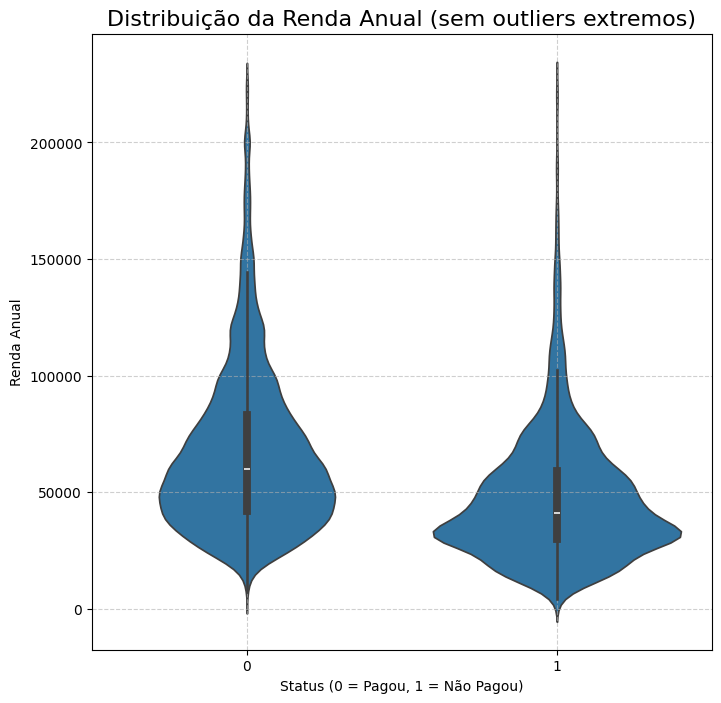

In [ ]:
plt.figure(figsize=(8, 8))
sns.violinplot(x='status_emprestimo', y='renda_anual', data=credit_risk_filtrado)
plt.title('Distribuição da Renda Anual (sem outliers extremos)', fontsize=16)
plt.xlabel('Status (0 = Pagou, 1 = Não Pagou)')
plt.ylabel('Renda Anual')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Resposta:**

Podemos que observar que embora seja uma diferença sutil a renda está ligado capacidade de pagamento levando em consideração que a média dos salários dos adimplentes está um pouco mais alta do que os inadimplentes, e pelo gráfico conseguimos observar que existe um concentração maior de salários mais baixos nos inadimplentes. Então embora não seja uma relação tão direta eles estão sim relacionados bem sutilmente

**O score de crédito reflete corretamente a capacidade de pagamento?**

In [ ]:
taxa_inadimplencia = credit_risk.groupby('classificacao_emprestimo')['status_emprestimo'].mean() * 100

taxa_inadimplencia.round(2).astype(str) + ' %'

,status_emprestimo
classificacao_emprestimo,
A,9.96 %
B,16.28 %
C,20.73 %
D,59.05 %
E,64.42 %
F,70.54 %
G,98.44 %


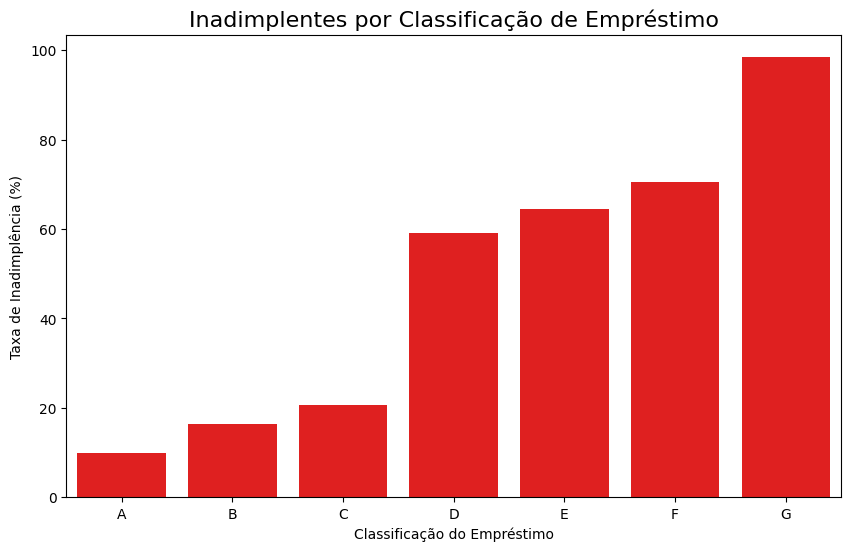

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=taxa_inadimplencia.index, y=taxa_inadimplencia.values, color='red')

plt.title('Inadimplentes por Classificação de Empréstimo', fontsize=16)
plt.xlabel('Classificação do Empréstimo')
plt.ylabel('Taxa de Inadimplência (%)')
plt.show()

**Resposta:**

Podemos observar tanto através do gráfico como da tabela que sim, a Classificação dos empréstimos refletem bem o nível de inadimplentes levando em consideração que a melhor classificação teve 10% dos inadimplentes e a pior classificação teve 98% dos inadimplentes

**Quais variáveis mais influenciam o risco de inadimplência?**

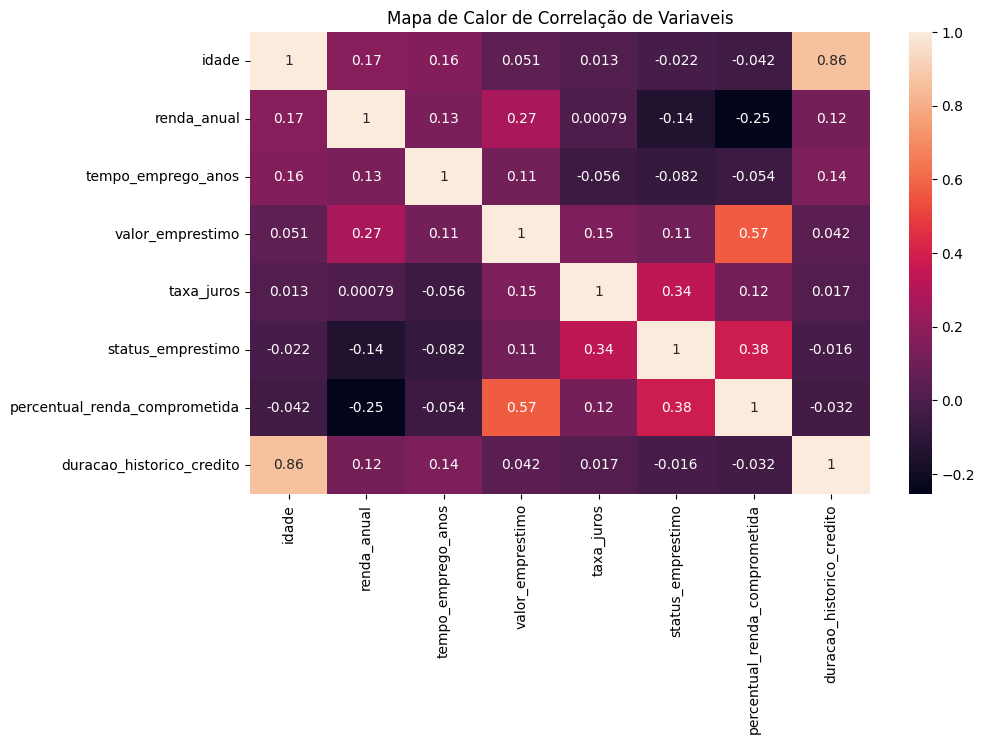

In [ ]:
df_numerico = credit_risk.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))

sns.heatmap(df_numerico.corr(), annot=True)

plt.title('Mapa de Calor de Correlação de Variaveis')
plt.show()


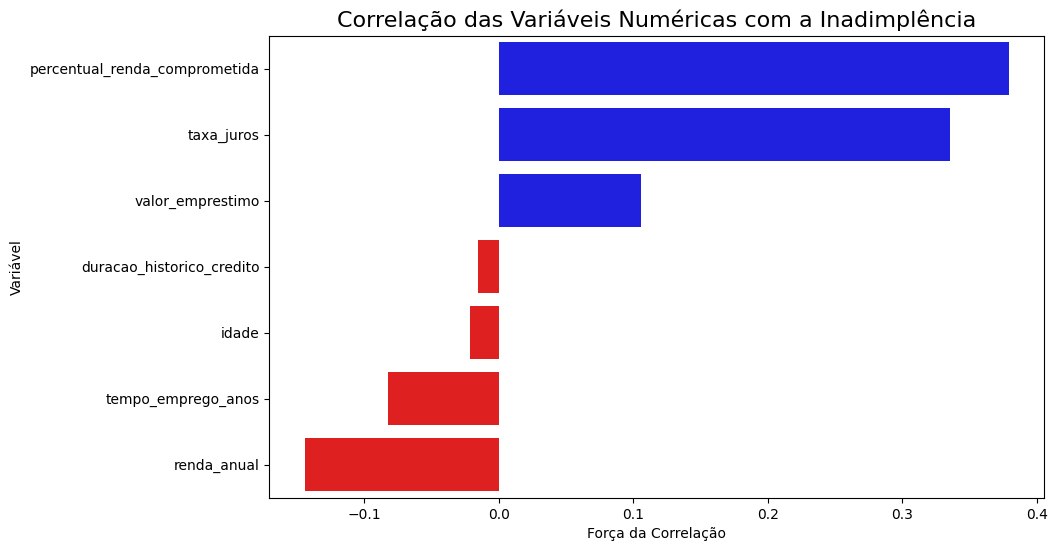

In [ ]:
matriz_correlacao = df_numerico.corr()
correlacao_com_status = matriz_correlacao['status_emprestimo'].sort_values(ascending=False)

cores = ['blue' if x > 0 else 'red' for x in correlacao_com_status.values[1:]]

plt.figure(figsize=(10, 6))
sns.barplot(x=correlacao_com_status.values[1:], y=correlacao_com_status.index[1:], hue=correlacao_com_status.index[1:], palette=cores)
plt.title('Correlação das Variáveis Numéricas com a Inadimplência', fontsize=16)
plt.xlabel('Força da Correlação')
plt.ylabel('Variável')
plt.show()

In [ ]:
taxa_por_finalidade = credit_risk.groupby('finalidade_emprestimo')['status_emprestimo'].mean().sort_values(ascending=False) * 100
taxa_por_finalidade.round(2).astype(str) + ' %'

,status_emprestimo
finalidade_emprestimo,
Consolidação de Dívidas,28.59 %
Médico,26.7 %
Reforma da Casa,26.1 %
Pessoal,19.89 %
Educação,17.22 %
Empreendimento,14.81 %


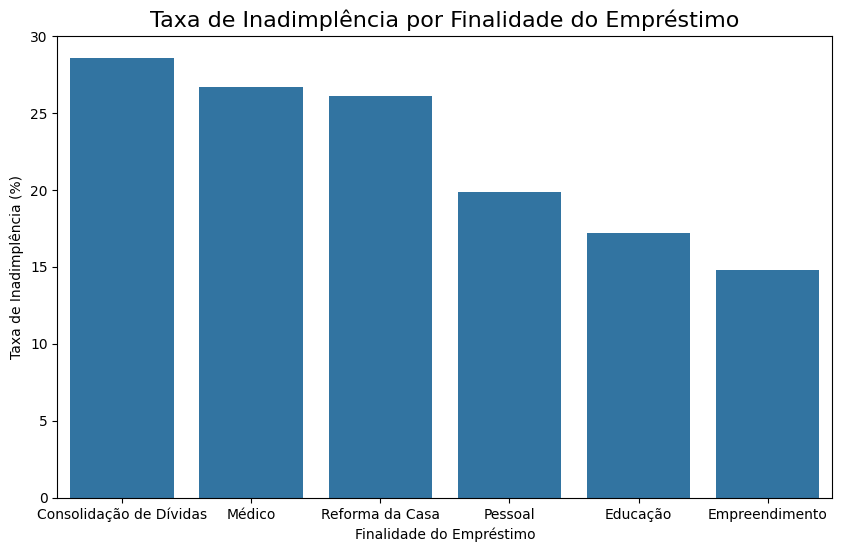

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=taxa_por_finalidade.index, y=taxa_por_finalidade.values)
plt.title('Taxa de Inadimplência por Finalidade do Empréstimo', fontsize=16)
plt.ylabel('Taxa de Inadimplência (%)')
plt.xlabel('Finalidade do Empréstimo')
plt.show()

In [ ]:
taxa_por_moradia = credit_risk.groupby('tipo_moradia')['status_emprestimo'].mean().sort_values(ascending=False) * 100
taxa_por_moradia.round(2).astype(str) + ' %'

,status_emprestimo
tipo_moradia,
Aluguel,31.57 %
Outro,30.84 %
Financiamento Imobiliário,12.57 %
Casa Própria,7.47 %


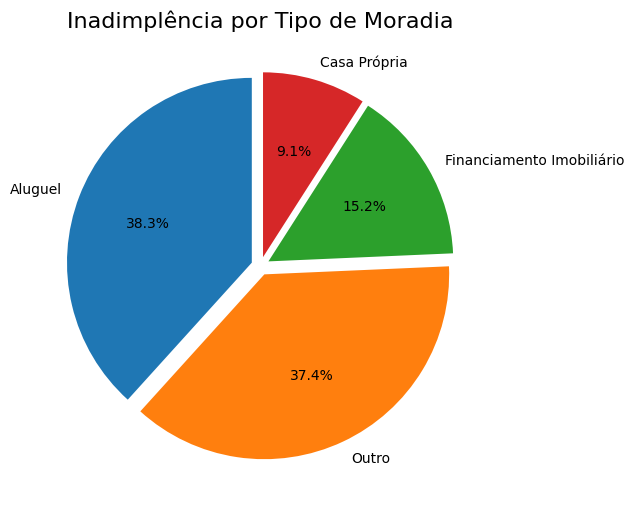

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(
  taxa_por_moradia.values,
  labels=taxa_por_moradia.index,
  autopct='%1.1f%%',
  startangle=90,
  explode = [0.05] * len(taxa_por_moradia)
)

plt.title('Inadimplência por Tipo de Moradia', fontsize=16)
plt.show()

**Resposta:**

Das variáveis numéricas é possivel observar tanto pelo gráfico de barras quanto pelo mapa de calor que as que mais influenciam é o percentual da renda comprometida, a taxa de juros e o valor do emprestimo. Agora das variaveis categóricas é possivel observar um alto nível de inadimplência para aqueles que pegam empréstimo para consolidar as suas outras dívidas e atendimento médico e também um nível alto de inadimplência daqueles que moram de aluguel. Observando essas informações elas fazem bastante sentido afinal de contas quando você faz um nova dívida para pagar outra que estava atrasada a probabilidade de fazer ficar inadimplente nessa nova é muito grande, e pessoas que moram de aluguel ja tem um gasto a mais todo o mês e quando comprometem ainda mais de seus salários para pegarem um empréstimo a probabilidade de inadimplência é alta também

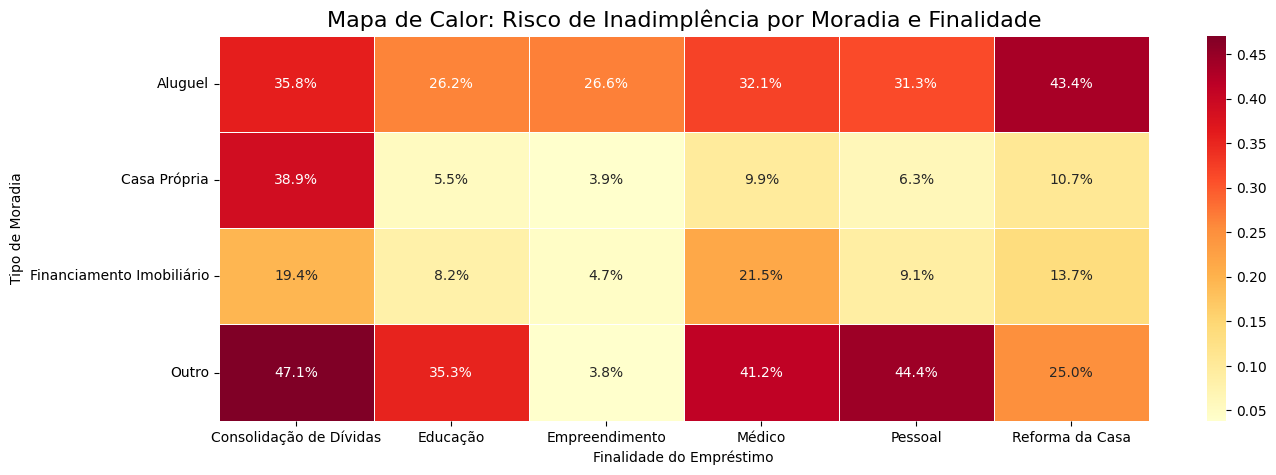

In [ ]:
tabela_cruzada = credit_risk.pivot_table(
  values='status_emprestimo',
  index='tipo_moradia',
  columns='finalidade_emprestimo',
  aggfunc='mean'
)

tabela_cruzada.fillna(0, inplace=True)

plt.figure(figsize=(15, 5))
sns.heatmap(
  tabela_cruzada,
  annot=True,
  fmt='.1%',
  cmap='YlOrRd',
  linewidths=.5
)

plt.title('Mapa de Calor: Risco de Inadimplência por Moradia e Finalidade', fontsize=16)
plt.xlabel('Finalidade do Empréstimo')
plt.ylabel('Tipo de Moradia')
plt.show()

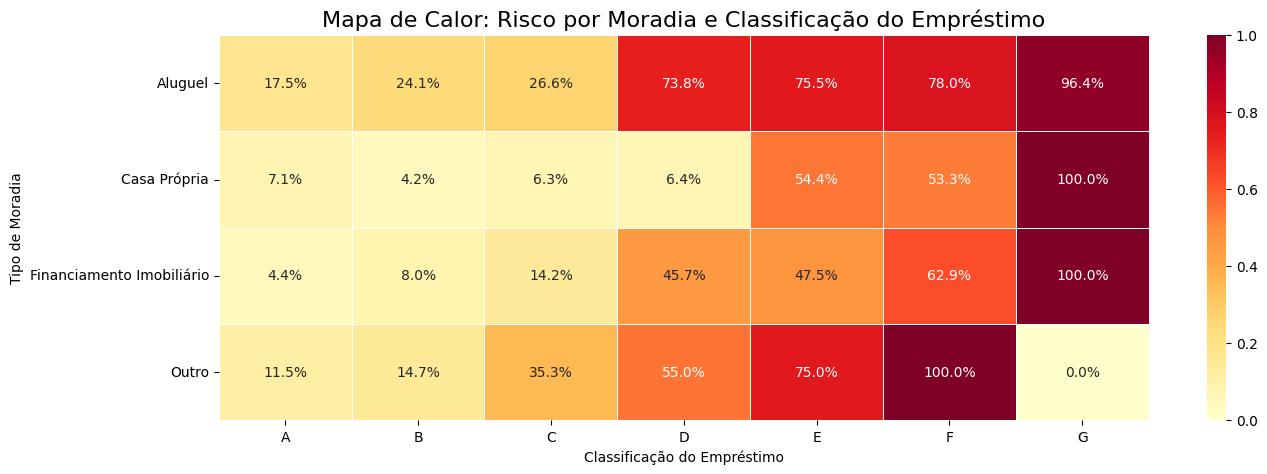

In [ ]:
tabela_cruzada_grade = credit_risk.pivot_table(
  values='status_emprestimo',
  index='tipo_moradia',
  columns='classificacao_emprestimo',
  aggfunc='mean'
)

tabela_cruzada_grade.fillna(0, inplace=True)

colunas_ordenadas = sorted(tabela_cruzada_grade.columns)
tabela_cruzada_grade = tabela_cruzada_grade[colunas_ordenadas]

plt.figure(figsize=(15, 5))
sns.heatmap(
  tabela_cruzada_grade,
  annot=True,
  fmt='.1%',
  cmap='YlOrRd',
  linewidths=.5
)

plt.title('Mapa de Calor: Risco por Moradia e Classificação do Empréstimo', fontsize=16)
plt.xlabel('Classificação do Empréstimo')
plt.ylabel('Tipo de Moradia')
plt.show()

In [ ]:
df_inadimplentes = credit_risk[credit_risk['status_emprestimo'] == 1].copy()

agrupado_por_grade = df_inadimplentes.groupby('classificacao_emprestimo')

perfil_inadimplentes = agrupado_por_grade.agg(
  moradia_mais_comum=('tipo_moradia', lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A'),
  finalidade_mais_comum=('finalidade_emprestimo', lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')
)

perfil_inadimplentes['total_inadimplentes'] = agrupado_por_grade.size()

perfil_inadimplentes = perfil_inadimplentes.sort_index()

perfil_inadimplentes

,moradia_mais_comum,finalidade_mais_comum,total_inadimplentes
classificacao_emprestimo,,,
A,Aluguel,Médico,1073
B,Aluguel,Médico,1701
C,Aluguel,Médico,1339
D,Aluguel,Médico,2141
E,Aluguel,Médico,621
F,Aluguel,Médico,170
G,Financiamento Imobiliário,Empreendimento,63


**Conclusão:**

Através desses mapas de calor conseguimos observar exatamente isso que os gráficos anteriores informaram as pessoas que estão nos alugueis normalmente pegam emprestimos para consolidar suas dívidas ou fazer reformas na casa que são os tipos de empréstimo com maior número de inadimpentes até mesmo na classificação de emprestimo A que normalmente é a com menor risco de inadimplentes, logo os bancos deveriam fazer uma análise mais minunciosa de cada perfil, como a taxa de juros é um dos influentes do nível de inadimplentes talvez abaixar a taxa para quem tem uma grande probabilidade de inadimplência, assim como restringir o valor liberado para aqueles que ja possuem uma grande margem de seus salários comprometidos, pois foi um dos maiores influentes na causa de inadimplências, e também tem uma avaliação bem criteriosa quando se tratar de pessoas que moram de aluguel e querem empréstimos do tipo de consolidação de dívidas, reforma de casa e finalidade médica